<a href="https://colab.research.google.com/github/nick18-ni/Aula-de-Visao-Computscional/blob/main/Girar%20texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ângulo detectado: -24.00 graus


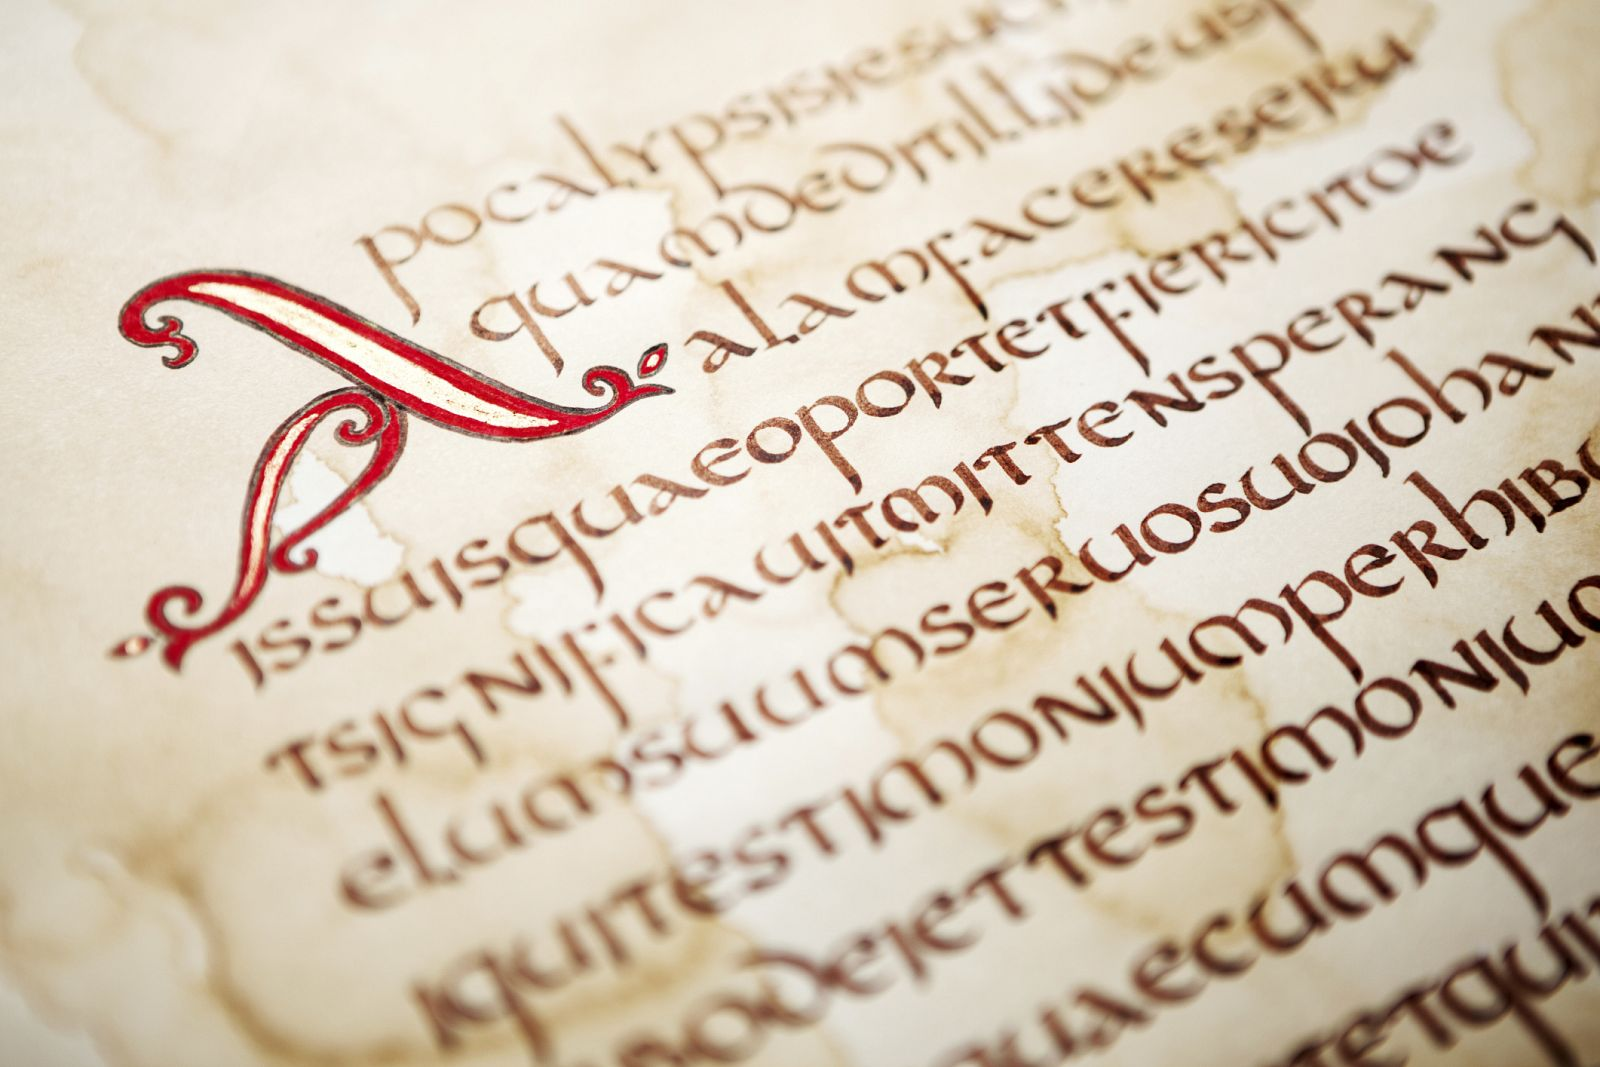

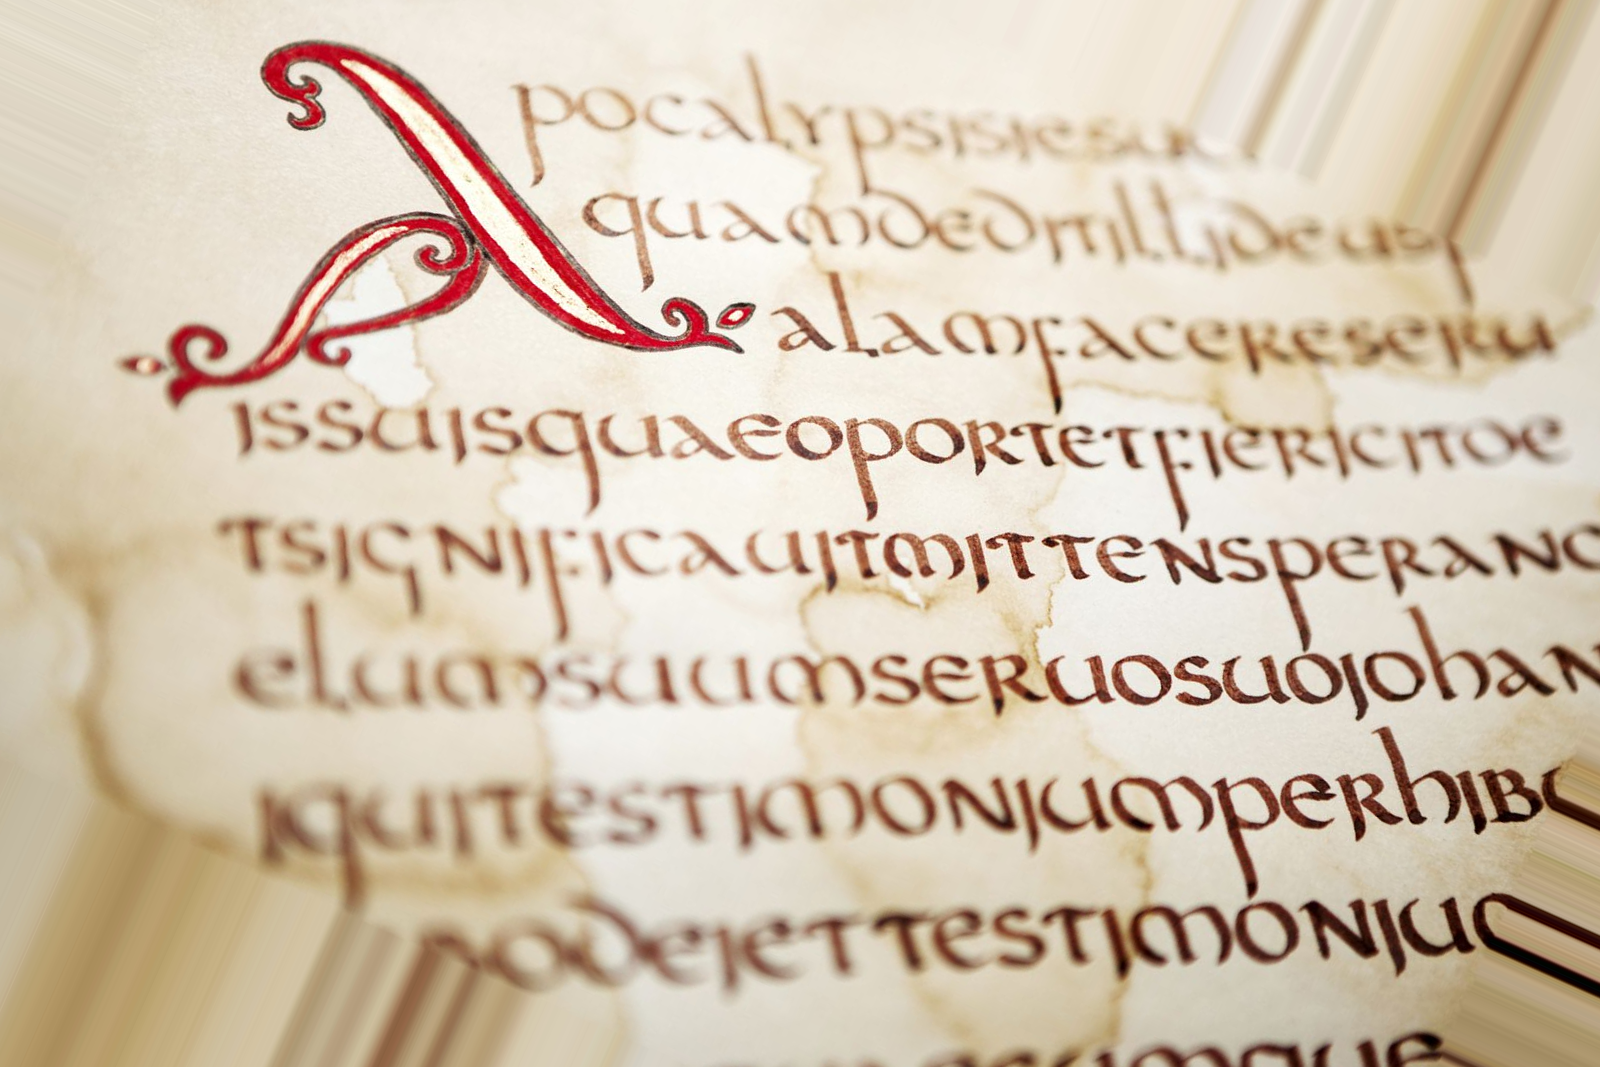

In [17]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Carregar a imagem
imagem = cv2.imread("texto.jpeg")

# Converter para escala de cinza
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Binarização adaptativa
binarizada = cv2.adaptiveThreshold(cinza, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 15, 10)

# Detectar bordas com Canny
bordas = cv2.Canny(binarizada, 50, 150)

# Transformada de Hough para detectar linhas
linhas = cv2.HoughLines(bordas, 1, np.pi / 180, 120)

# Lista de ângulos
angulos = []

# Calcular ângulo em graus e filtrar
for linha in linhas:
    rho, theta = linha[0]
    angulo = (theta * 180 / np.pi) - 90
    if -45 < angulo < 45:  # filtrar linhas quase horizontais
        angulos.append(angulo)

# Calcular ângulo médio
angulo_medio = np.median(angulos)

# Opcional: ajuste manual fino (caso ainda fique levemente torto)
ajuste_manual = -30  # ex: -2, +1.5, etc.
angulo_medio += ajuste_manual

# Obter centro da imagem
(h, w) = imagem.shape[:2]
centro = (w // 2, h // 2)

# Matriz de rotação
matriz = cv2.getRotationMatrix2D(centro, angulo_medio, 1.0)

# Aplicar rotação
corrigida = cv2.warpAffine(imagem, matriz, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# Mostrar resultados
print(f"Ângulo detectado: {angulo_medio:.2f} graus")
cv2_imshow(imagem)
cv2_imshow(corrigida)
